In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn.metrics import explained_variance_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [2]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_full = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_na_nona = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")

V_na_diff = np.zeros((V_ap.shape[0]))
V_nona_diff = np.zeros((V_ap.shape[0]))
V_full_diff = np.zeros((V_full.shape[0]))
V_na_nona_diff = np.zeros((V_na_nona.shape[0]))
V_na_diff[:-1] = np.diff(V_na)
V_nona_diff[:-1] = np.diff(V_nona)
V_full_diff[:-1] = np.diff(V_full)
V_na_nona_diff[:-1] = np.diff(V_na_nona)

V_pred_nona_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
V_pred_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_extra_output.npz")["test"].flatten() + V_pred_nona_mean
V_pred_na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_extra_output.npz")["test"].flatten()
V_pred = V_pred_na + V_pred_nona

V_pred_whole_mean = np.mean(np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"))
V_pred_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_extra_output.npz")["test"].flatten() + V_pred_whole_mean

V_pred_diff = np.zeros((V_pred.shape[0]))
V_pred_diff[:-1] = np.diff(V_pred)
V_pred_whole_diff = np.zeros((V_pred_whole.shape[0]))
V_pred_whole_diff[:-1] = np.diff(V_pred_whole)
V_pred_nona_diff = np.zeros((V_pred_nona.shape[0]))
V_pred_nona_diff[:-1] = np.diff(V_pred_nona)

spk = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train.npy")
test_spk = spk[980*50000:]
spk = spk[:980*50000]


In [3]:
print(np.min(V_pred_whole), np.max(V_pred_whole))
print(np.min(V_pred_whole_diff), np.max(V_pred_whole_diff))

print(np.min(V_pred), np.max(V_pred_whole))
print(np.min(V_pred_diff), np.max(V_pred_diff))

print(np.min(V_full), np.max(V_full))
print(np.min(V_full_diff), np.max(V_full_diff))

-68.88073255285688 -56.83449269995161
-0.909349799156189 2.579570949077606
-68.60308776282744 -56.83449269995161
-1.6805839238222688 1.8810050189495087
-68.495059333301 39.11660762421505
-11.568564138005675 51.71076810975849


In [4]:
V_ap = V_ap[:980*50000]
V_na = V_na[:980*50000]
V_nona = V_nona[:980*50000]
V_na_diff = V_na_diff[:980*50000]
V_nona_diff = V_nona_diff[:980*50000]
V_pred = V_pred[:980*50000]
V_pred_whole = V_pred_whole[:980*50000]
V_pred_diff = V_pred_diff[:980*50000]
V_pred_whole_diff = V_pred_whole_diff[:980*50000]
V_pred_nona = V_pred_nona[:980*50000]
V_pred_nona_diff = V_pred_nona_diff[:980*50000]
V_full = V_full[:980*50000]
V_full_diff = V_full_diff[:980*50000]
V_na_nona = V_na_nona[:980*50000]
V_na_nona_diff = V_na_nona_diff[:980*50000]

In [6]:
# V full
#diff_min = 0
#diff_max = 7
#val_max = -52.5
#val_min = -58.5

# V_na
diff_min = -1
diff_max = 1
val_max = -56
val_min = -63

# V_nona
#diff_max = 1
#diff_min = -1
#val_min = -62
#val_max = -56

val_interval = 0.1
diff_interval = 0.1

V = V_pred_whole
V_diff = V_pred_whole_diff

diff_bins = np.arange(diff_min, diff_max+0.001, diff_interval)
val_bins = np.arange(val_min, val_max+0.001, val_interval)
spk_2d_probs = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

counts_2d = np.empty((val_bins.shape[0]-1, diff_bins.shape[0]-1))

for i in tnrange(val_bins.shape[0]-1):
    for j in range(diff_bins.shape[0]-1):
        idx = np.where((V>=val_bins[i]) & (V<val_bins[i+1]) & (V_diff>=diff_bins[j]) & (V_diff<diff_bins[j+1]))[0]
        yes_count = np.sum(spk[idx])
        total_count = idx.shape[0]
        
        if total_count ==0:
            spk_2d_probs[i,j] = 0
            counts_2d[i,j] = 1
        else:
            spk_2d_probs[i,j] = yes_count / total_count
            counts_2d[i,j] = total_count

<ipython-input-6-b476eaad6373>:31: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/70 [00:00<?, ?it/s]

0.032373734693877554


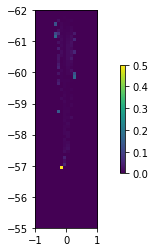

In [7]:
fig = plt.figure(figsize= (8,4))
plt.imshow(spk_2d_probs, extent=[diff_bins[0], diff_bins[-1], val_bins[-1], val_bins[0]])
plt.colorbar(shrink=0.5)
print(np.sum(counts_2d) / V.shape[0])

In [8]:
test_V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()[-20*50000:]
test_V_na_diff = np.zeros((test_V_na.shape[0]))
test_V_na_diff[:-1] = np.diff(test_V_na)
test_V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()[-20*50000:]
test_V_nona_diff = np.zeros((test_V_nona.shape[0]))
test_V_nona_diff[:-1] = np.diff(test_V_nona)

test_V_full = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()[-20*50000:]
test_V_full_diff = np.zeros((test_V_full.shape[0]))
test_V_full_diff[:-1] = np.diff(test_V_full)

test_V_na_nona = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1.npy")[-20*50000:]
test_V_na_nona_diff = np.zeros((test_V_na_nona.shape[0]))
test_V_na_nona_diff[:-1] = np.diff(test_V_na_nona)

test_V_pred_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"].flatten() + V_pred_nona_mean
test_V_pred_na = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"].flatten()
test_V_pred_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"].flatten() + V_pred_whole_mean
test_V_pred = test_V_pred_nona + test_V_pred_na
test_V_pred_diff = np.zeros((test_V_pred.shape[0]))
test_V_pred_whole_diff = np.zeros((test_V_pred_whole.shape[0]))
test_V_pred_diff[:-1] = np.diff(test_V_pred)
test_V_pred_whole_diff[:-1] = np.diff(test_V_pred_whole)

test_V = test_V_pred_whole
test_V_diff = test_V_pred_whole_diff

test_S = np.zeros((test_V.shape[0]))
test_P = np.zeros((test_V.shape[0]))
idx_total = 0

for i in tnrange(val_bins.shape[0]-1):
    for j in range(diff_bins.shape[0]-1):
        test_idx_val = np.where((test_V>=val_bins[i]) & (test_V<val_bins[i+1]))[0]
        test_idx_diff = np.where((test_V_diff>=diff_bins[j]) & (test_V_diff<diff_bins[j+1]))[0]
        test_idx = np.intersect1d(test_idx_val, test_idx_diff)
        spk_sample = np.random.binomial(n=1, p=spk_2d_probs[i,j], size=test_idx.shape[0])
        test_S[test_idx] = spk_sample
        test_P[test_idx] = spk_2d_probs[i,j]
        idx_total += test_idx.shape[0]
        
test_P[test_P == 0] = 0.000001
test_P[test_P == 1] = 0.999999

nll = -test_spk*np.log(test_P) - (1-test_spk)*np.log(1-test_P)
nll_mean = np.mean(nll)
print(nll_mean)

<ipython-input-8-0fc1323049f8>:32: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(val_bins.shape[0]-1):


  0%|          | 0/70 [00:00<?, ?it/s]

0.0012762369279406469


In [11]:
# V_full: 6.936304312888151e-05
# V_na: 0.0011472527338595613
# V_comb_pred: 0.0012012810654352646
# V_whole_pred: 0.0012762369279406469
# V_nona: 0.0012821353802818481
# V_nona_pred: 0.0013484554374726507



0.06818181818181818


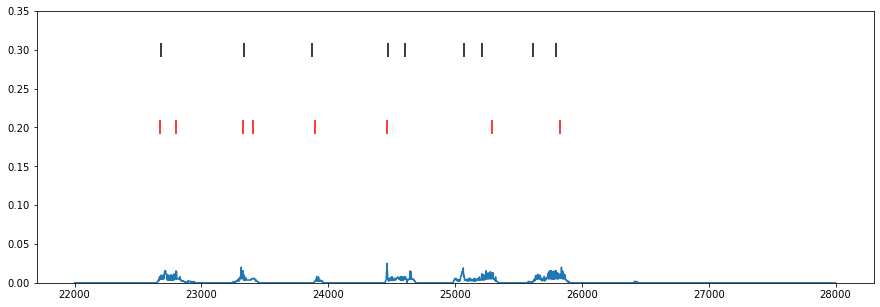

In [10]:
plt.figure(figsize = (15,5))
plt.scatter(np.arange(50000)[22000:28000], test_S[-50000:][22000:28000]*0.3-0.1, s=200, marker="|", color="red")
plt.scatter(np.arange(50000)[22000:28000], test_spk[-50000:][22000:28000]*0.4-0.1, s=200, marker="|", color="black")
plt.plot(np.arange(50000)[22000:28000], test_P[-50000:][22000:28000])
plt.ylim(0, 0.35)
print(np.max(test_P))

0.96077432675104


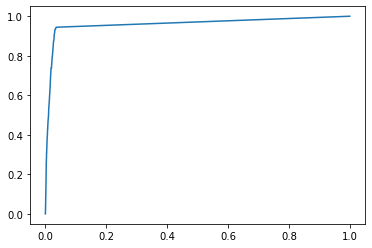

In [16]:
roc_auc = roc_auc_score(test_spk, test_P)
fpr, tpr, thresholds = metrics.roc_curve(test_spk, test_P)

print(roc_auc)
plt.plot(fpr, tpr)

In [7]:
V_ap = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_na = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()
V_nona = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000].flatten()

In [8]:
V_ap_na = V_ap - V_na
V_ap_nona = V_ap - V_nona
V_na_nona = V_na - V_nona

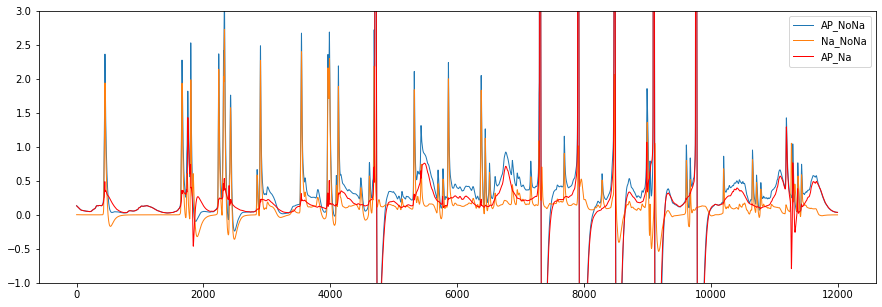

In [9]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
plt.legend()

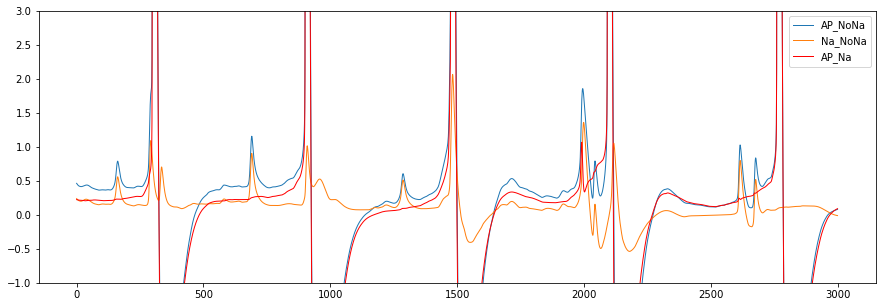

In [10]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000][7000:10000], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000][7000:10000], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000][7000:10000], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
#plt.xlim(4500,5000)
plt.legend()

(-66.0, -55.0)

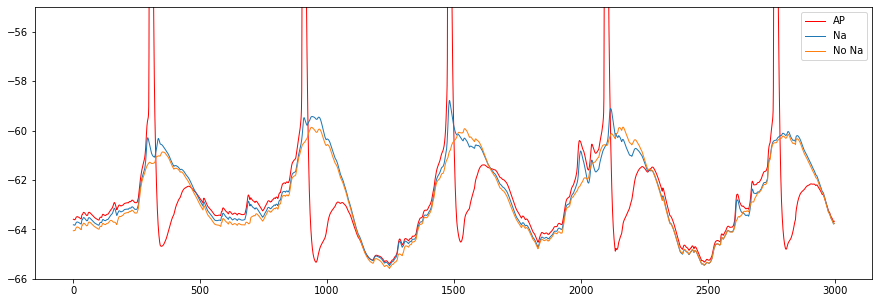

In [17]:
plt.figure(figsize = (15,5))
plt.plot(V_ap[:50000][16000:28000][7000:10000], linewidth=1, color="red", label="AP")
plt.plot(V_na[:50000][16000:28000][7000:10000], linewidth=1, label="Na")
plt.plot(V_nona[:50000][16000:28000][7000:10000], linewidth=1, label="No Na")
plt.legend()
plt.ylim(-66,-55)

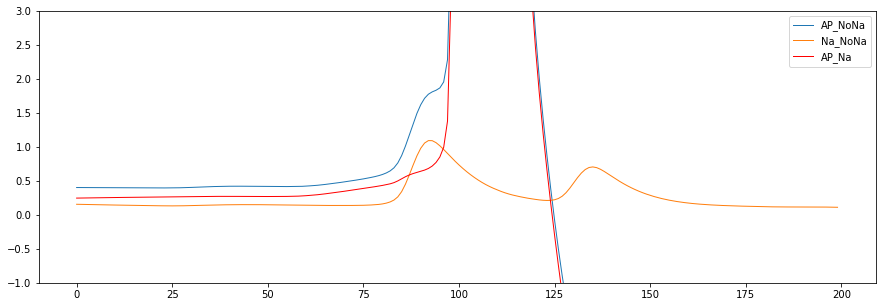

In [17]:
plt.figure(figsize = (15,5))

plt.plot(V_ap_nona[:50000][16000:28000][7200:7400], label="AP_NoNa", linewidth=1)
plt.plot(V_na_nona[:50000][16000:28000][7200:7400], label="Na_NoNa", linewidth=1)
plt.plot(V_ap_na[:50000][16000:28000][7200:7400], label="AP_Na", linewidth=1, color="red")
plt.ylim(-1,3)
#plt.xlim(4500,5000)
plt.legend()

In [3]:
#na_train = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:980,:50000]
#na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[980:,:50000]
#nona_train = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_extra_output.npz")["test"]
#nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]

na_train = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_extra_output.npz")["test"]
na_test = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
nona_train = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:980,:50000]
nona_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[980:,:50000]

train = na_train + nona_train
test = na_test + nona_test
full = np.vstack((train, test))


In [4]:
#np.save("/media/hdd01/sklee/CA1_clust4-60_AP/na_pred_nona_true/V_na_pred_nona_true.npy", full)

In [3]:
na_true_nona_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true_nona_pred/gru_h30_test.npy")
na_pred_nona_true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_pred_nona_true/gru_h30_test.npy")
na_true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_h30_test.npy")
comb_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_h30_test.npy")
whole_pred = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_h30_test.npy")
true = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/V_diff_stimseed1.npy")[980*50000:].reshape(-1,50000)

In [4]:
var_exp = np.empty((20,5))
for i in tnrange(20):
    var_exp[i,0] = explained_variance_score(true[i], na_true[i])
    var_exp[i,1] = explained_variance_score(true[i], whole_pred[i])
    var_exp[i,2] = explained_variance_score(true[i], comb_pred[i])
    var_exp[i,3] = explained_variance_score(true[i], na_true_nona_pred[i])
    var_exp[i,4] = explained_variance_score(true[i], na_pred_nona_true[i])

<ipython-input-4-010c6ef4d5c6>:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(20):


  0%|          | 0/20 [00:00<?, ?it/s]

Text(0, 0.5, 'Variance Explained')

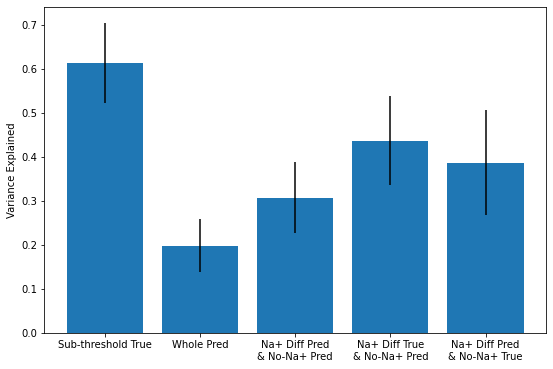

In [15]:
plt.figure(figsize = (9,6))
plt.bar(["Sub-threshold True", "Whole Pred", "Na+ Diff Pred\n& No-Na+ Pred", "Na+ Diff True\n& No-Na+ Pred",
              "Na+ Diff Pred\n& No-Na+ True"], np.mean(var_exp, 0), yerr=np.std(var_exp, 0))
plt.ylabel("Variance Explained")

Text(0, 0.5, 'Voltage (mV)')

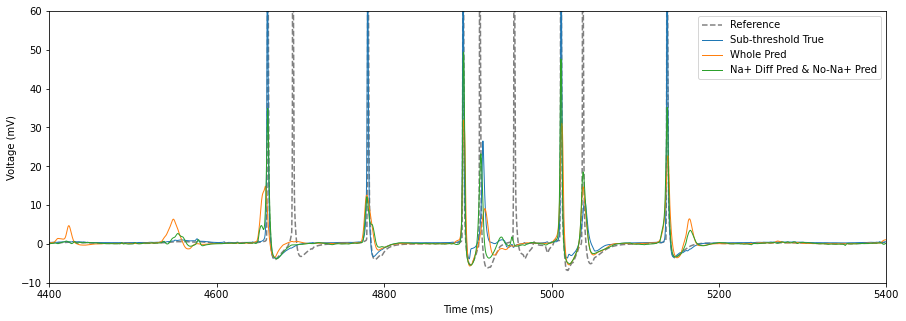

In [34]:
plt.figure(figsize = (15,5))
plt.plot(np.arange(0,10000,0.2), true[0], color="gray", linestyle="--", label="Reference")
plt.plot(np.arange(0,10000,0.2), na_true[0], label="Sub-threshold True", linewidth=1)
plt.plot(np.arange(0,10000,0.2), whole_pred[0], label="Whole Pred", linewidth=1)
plt.plot(np.arange(0,10000,0.2), comb_pred[0], label="Na+ Diff Pred & No-Na+ Pred", linewidth=1)
#plt.plot(np.arange(0,10000,0.2), na_true_nona_pred[0], label="Na+ Diff True & No-Na+ Pred", linewidth=1)
plt.legend()

plt.xlim(22000/5,27000/5)
plt.ylim(-10,60)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

In [5]:
comb_pred_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/comb_pred/gru_l20_h40_40ms_test.npy").flatten()
whole_pred_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/gru_l20_h40_40ms_test.npy").flatten()
ap_true_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/ap_true/gru_l20_h40_40ms_test.npy").flatten()
na_true_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/na_true/gru_l20_h40_40ms_test.npy").flatten()
nona_true_test = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/nona_true/gru_l20_h40_40ms_test.npy").flatten()
spk = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/data/spike_train_40ms.npy")[980*250:].flatten()
print(spk.shape)

(5000,)


In [6]:
auc_comb_pred = roc_auc_score(spk, comb_pred_test)
auc_whole_pred = roc_auc_score(spk, whole_pred_test)
auc_ap_true = roc_auc_score(spk, ap_true_test)
auc_na_true = roc_auc_score(spk, na_true_test)
auc_nona_true = roc_auc_score(spk, nona_true_test)

fpr_comb_pred, tpr_comb_pred, _ = metrics.roc_curve(spk, comb_pred_test)
fpr_whole_pred, tpr_whole_pred, _ = metrics.roc_curve(spk, whole_pred_test)
fpr_ap_true, tpr_ap_true, _ = metrics.roc_curve(spk, ap_true_test)
fpr_na_true, tpr_na_true, _ = metrics.roc_curve(spk, na_true_test)
fpr_nona_true, tpr_nona_true, _ = metrics.roc_curve(spk, nona_true_test)

prec_comb_pred, rec_comb_pred, _ = precision_recall_curve(spk, comb_pred_test)
prec_whole_pred, rec_whole_pred, _ = precision_recall_curve(spk, whole_pred_test)
prec_ap_true, rec_ap_true, _ = precision_recall_curve(spk, ap_true_test)
prec_na_true, rec_na_true, _ = precision_recall_curve(spk, na_true_test)
prec_nona_true, rec_nona_true, _ = precision_recall_curve(spk, nona_true_test)

prarea_comb_pred = metrics.auc(rec_comb_pred, prec_comb_pred)
prarea_whole_pred = metrics.auc(rec_whole_pred, prec_whole_pred)
prarea_ap_true = metrics.auc(rec_ap_true, prec_ap_true)
prarea_na_true = metrics.auc(rec_na_true, prec_na_true)
prarea_nona_true = metrics.auc(rec_nona_true, prec_nona_true)


Text(0.5, 1.0, '40ms')

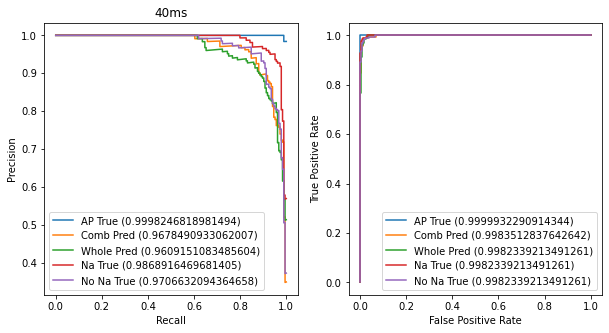

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

axs[0].plot(rec_ap_true, prec_ap_true, label="AP True ("+str(prarea_ap_true)+")")
axs[0].plot(rec_comb_pred, prec_comb_pred, label="Comb Pred ("+str(prarea_comb_pred)+")")
axs[0].plot(rec_whole_pred, prec_whole_pred, label="Whole Pred ("+str(prarea_whole_pred)+")")
axs[0].plot(rec_na_true, prec_na_true, label="Na True ("+str(prarea_na_true)+")")
axs[0].plot(rec_nona_true, prec_nona_true, label="No Na True ("+str(prarea_nona_true)+")")
axs[0].legend()
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")

axs[1].plot(fpr_ap_true, tpr_ap_true, label="AP True ("+str(auc_ap_true)+")")
axs[1].plot(fpr_comb_pred, tpr_comb_pred, label="Comb Pred ("+str(auc_comb_pred)+")")
axs[1].plot(fpr_whole_pred, tpr_whole_pred, label="Whole Pred ("+str(auc_whole_pred)+")")
axs[1].plot(fpr_na_true, tpr_na_true, label="Na True ("+str(auc_whole_pred)+")")
axs[1].plot(fpr_nona_true, tpr_nona_true, label="No Na True ("+str(auc_whole_pred)+")")

axs[1].legend()
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[0].set_title("40ms")

In [4]:
V_raw_train = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_extra_output.npz")["test"]
V_raw_test = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/hand/gru_s10_h20_output.npz")["test"]
V_raw = np.vstack((V_raw_train, V_raw_test))
print(V_raw.shape)

(1000, 50000)


In [9]:
#V_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
#V_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
#V_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
#V_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_AP/whole_pred/V_whole_pred_0.2ms.npy")

bin_size = 5 * 5
V_short = np.zeros((V_raw.shape[0], 50000//bin_size))

for i in range(50000//bin_size):
    V_short[:,i] = np.mean(V_raw[:,i*bin_size:(i+1)*bin_size], 1)
    
print(V_short.shape)

(1000, 2000)


In [10]:
np.save("/media/hdd01/sklee/CA1_clust4-60_AP/nona_pred/V_nona_pred_5ms.npy", V_short)

In [40]:
V = np.load("/media/hdd01/sklee/CA1_clust4-60_aSoma/ap_true/V_ap_true_10ms.npy").flatten()
threshold = -59.3

raw_idx = np.where(V >= threshold)[0]
true_idx = []

for i in tnrange(raw_idx.shape[0]):
    if i == 0:
        true_idx.append(raw_idx[i])
    elif raw_idx[i] - raw_idx[i-1] > 1:
        true_idx.append(raw_idx[i])
        
true_idx = np.asarray(true_idx)
print(true_idx.shape[0])

spk = np.zeros((V.shape[0]))
spk[true_idx] = 1
print(np.sum(spk))
print(V.shape[0]/1000)

<ipython-input-40-75d85fc9d3d9>:7: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(raw_idx.shape[0]):


  0%|          | 0/9192 [00:00<?, ?it/s]

7612
7612.0
1000.0


In [26]:
np.save("/media/hdd01/sklee/CA1_clust4-60_aSoma/data/spike_train_10ms.npy", spk)

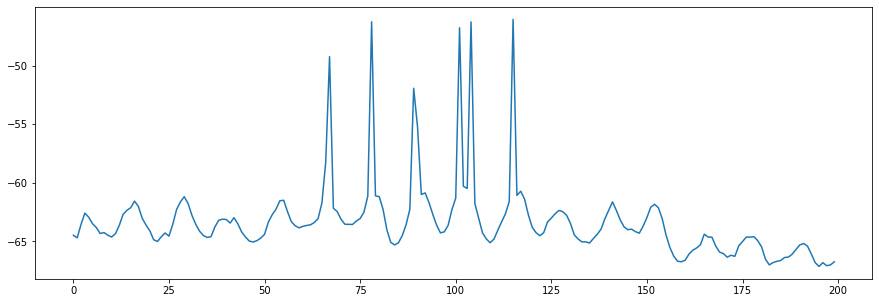

In [33]:
plt.figure(figsize = (15,5))
plt.plot(V[:1000][400:600])